## Objective 

The objective of this project is to perform a comprehensive analysis of emoji usage patterns across various platforms and user demographics using Python. The dataset includes columns for emoji, context, platform, user age, and user gender. The primary goals of this analysis are to uncover trends and insights into how different emojis are used in different contexts, identify platform-specific emoji usage patterns, and understand how user age and gender influence emoji preferences. By analyzing these factors, the project aims to provide valuable insights into user behavior and preferences related to emojis, which can be beneficial for developers, marketers, and researchers interested in understanding digital communication trends.

## Import Libraries 

In [4]:
import pandas as pd 
import numpy as np 

In [6]:
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
# warning remove alerts
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [11]:
data = pd.read_csv('emoji_usage_dataset.csv', encoding='utf-8')

### Starting 5 rows 

In [14]:
# Display the first few rows of each dataset
data.head()

,Emoji,Context,Platform,User Age,User Gender
0,😎,angry,Snapchat,47,Male
1,👍,love,Instagram,36,Male
2,😳,angry,Snapchat,51,Male
3,😂,confusion,Facebook,64,Male
4,🤣,celebration,Snapchat,56,Female


### End 5 rows 

In [17]:
data.tail()

,Emoji,Context,Platform,User Age,User Gender
4995,🤪,love,Snapchat,33,Male
4996,🙌,celebration,WhatsApp,55,Male
4997,😂,celebration,TikTok,63,Male
4998,😘,support,Snapchat,15,Female
4999,👏,happy,TikTok,55,Female


## Information about data

### Shape 

In [21]:
data.shape

(5000, 5)

### Size 

In [24]:
data.size 

25000

### Columns 

In [27]:
data.columns

Index(['Emoji', 'Context', 'Platform', 'User Age', 'User Gender'], dtype='object')

### Info

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Emoji        5000 non-null   object
 1   Context      5000 non-null   object
 2   Platform     5000 non-null   object
 3   User Age     5000 non-null   int64 
 4   User Gender  5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


### Dtypes 

In [33]:
data.dtypes

Emoji          object
Context        object
Platform       object
User Age        int64
User Gender    object
dtype: object

### Check Duplicates 

In [36]:
data.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997     True
4998    False
4999    False
Length: 5000, dtype: bool

In [38]:
print(data.duplicated().sum())

82


### Check Null Values 

In [41]:
data.isnull().sum()

Emoji          0
Context        0
Platform       0
User Age       0
User Gender    0
dtype: int64

## Exploratory Data Analysis (EDA)

### 1. Top 10 Most Used Emojis

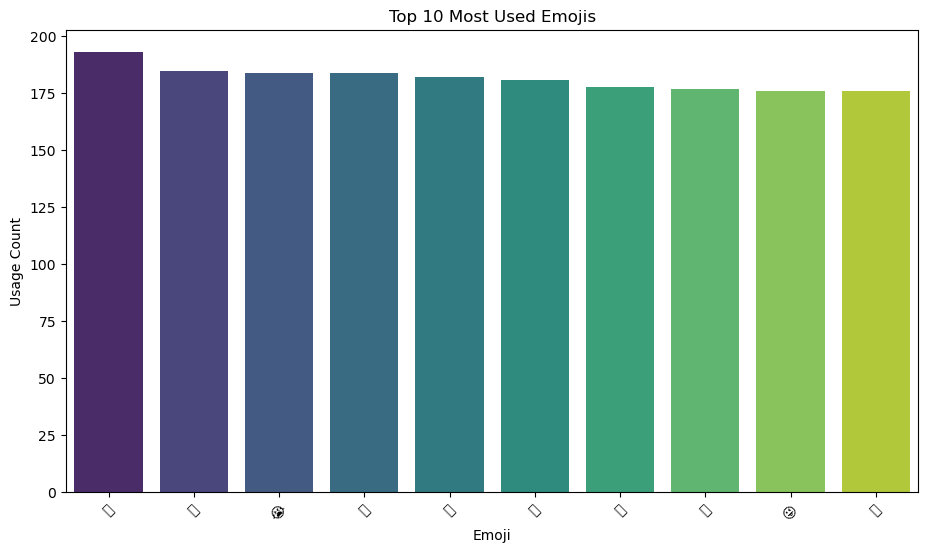

In [45]:
top_emojis = data['Emoji'].value_counts().head(10)
plt.figure(figsize=(11, 6))
sns.barplot(x=top_emojis.index, y=top_emojis.values, palette='viridis')
plt.title('Top 10 Most Used Emojis')
plt.xlabel('Emoji')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.show()

### 2. Emoji Usage by Platform

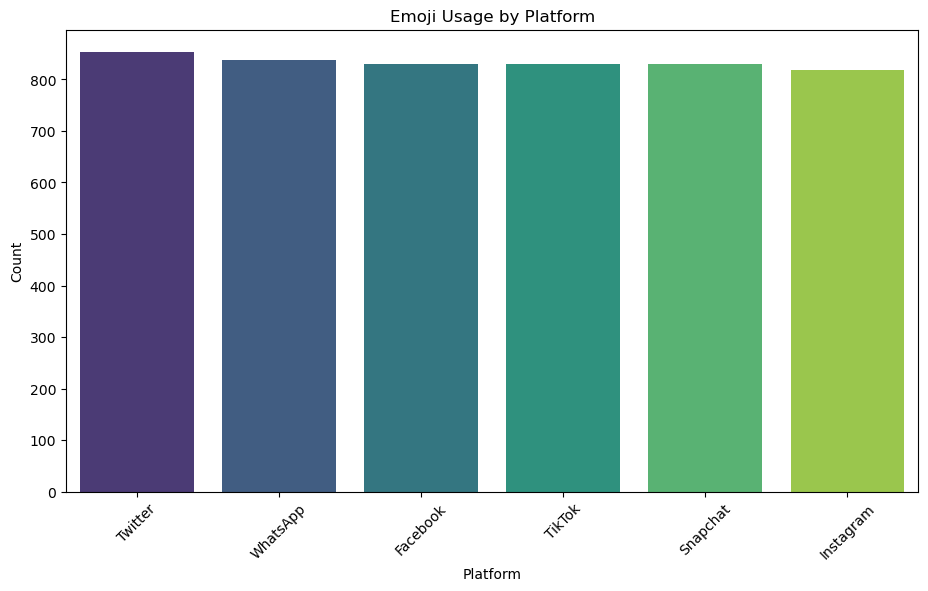

In [48]:
plt.figure(figsize=(11, 6))
sns.countplot(data=data, x='Platform', order=data['Platform'].value_counts().index, palette='viridis')
plt.title('Emoji Usage by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 3. Emoji Usage by Context

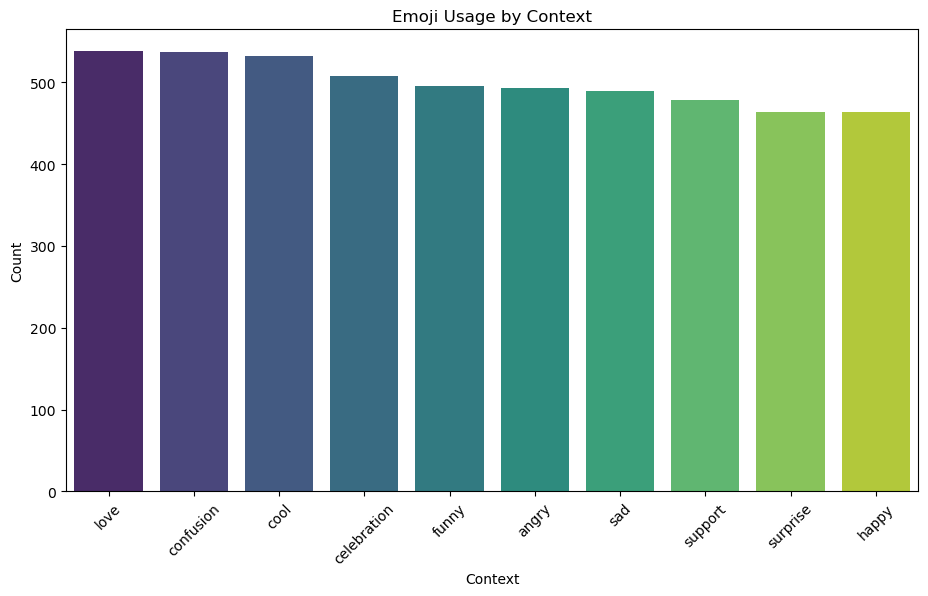

In [51]:
plt.figure(figsize=(11, 6))
sns.countplot(data=data, x='Context', order=data['Context'].value_counts().index, palette='viridis')
plt.title('Emoji Usage by Context')
plt.xlabel('Context')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 4. Emoji Usage by User Age

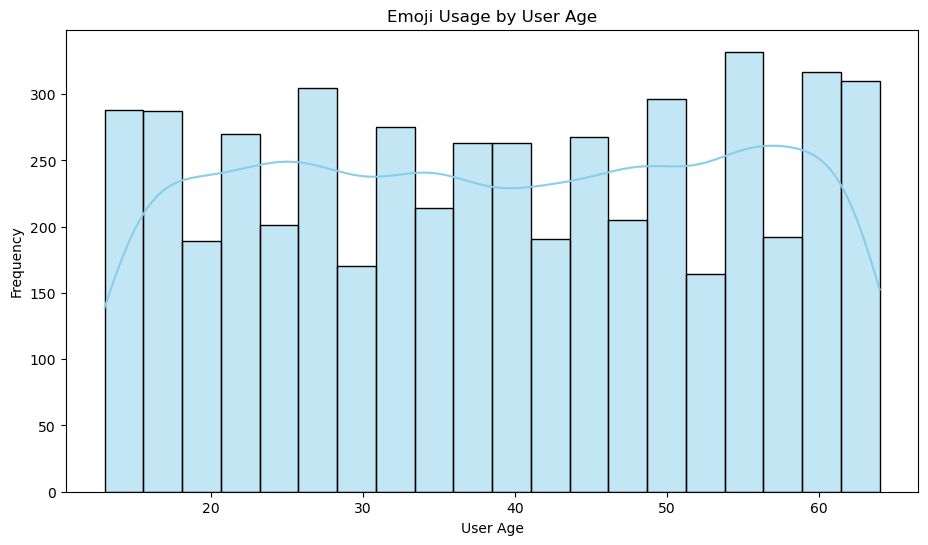

In [54]:
plt.figure(figsize=(11, 6))
sns.histplot(data['User Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Emoji Usage by User Age')
plt.xlabel('User Age')
plt.ylabel('Frequency')
plt.show()

### 5. Emoji Usage by User Gender

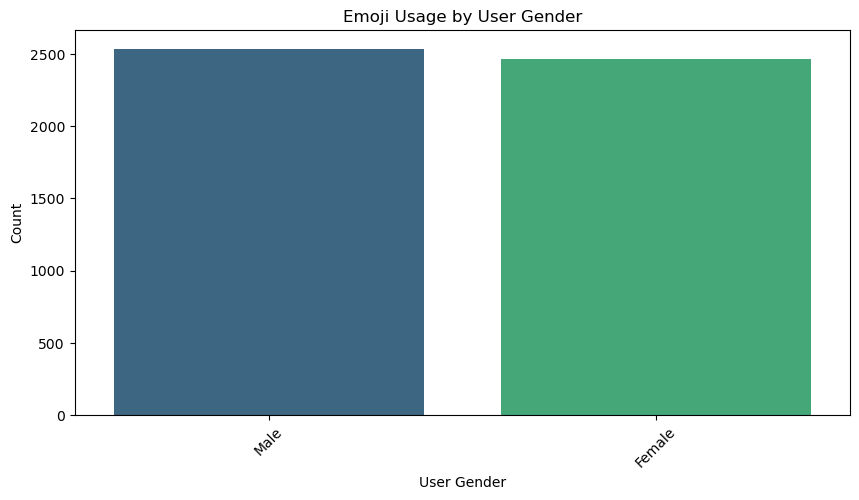

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='User Gender', palette='viridis')
plt.title('Emoji Usage by User Gender')
plt.xlabel('User Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 6. Number of Unique Emojis

In [60]:
unique_emojis = data['Emoji'].nunique()
print(f'Number of Unique Emojis: {unique_emojis}')

Number of Unique Emojis: 30


### 7. Most Common Emoji per Platform

In [63]:
common_emoji_per_platform = data.groupby('Platform')['Emoji'].agg(lambda x: x.mode()[0])
print(common_emoji_per_platform)

Platform
Facebook     😭
Instagram    😜
Snapchat     🤗
TikTok       👏
Twitter      💕
WhatsApp     🤔
Name: Emoji, dtype: object


### 8. Most Common Emoji per Context

In [66]:
common_emoji_per_context = data.groupby('Context')['Emoji'].agg(lambda x: x.mode()[0])
print(common_emoji_per_context)

Context
angry          😭
celebration    😘
confusion      👏
cool           🤩
funny          🙏
happy          😡
love           👍
sad            😜
support        💕
surprise       💔
Name: Emoji, dtype: object


### 9. Distribution of Emojis Across Different Platforms

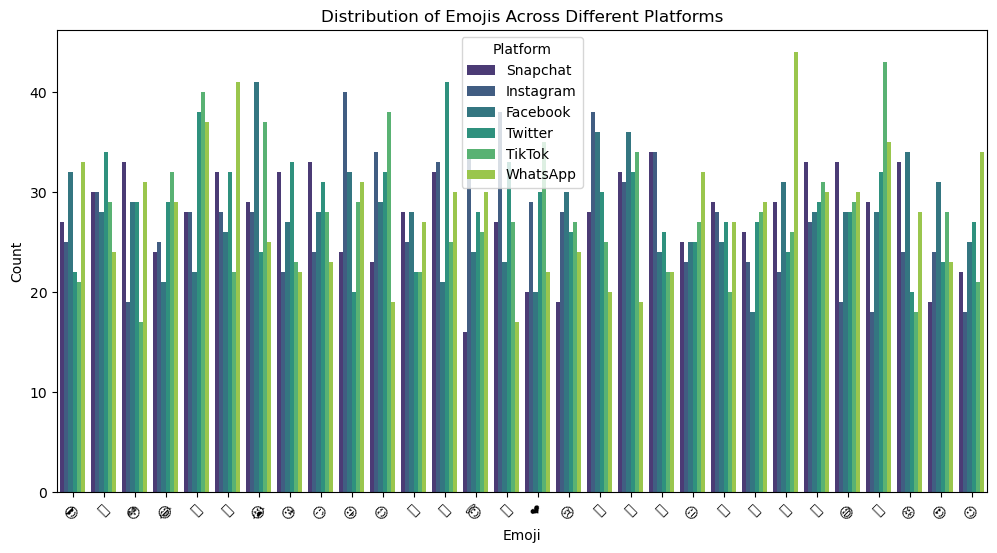

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Emoji', hue='Platform', palette='viridis')
plt.title('Distribution of Emojis Across Different Platforms')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 10. Distribution of Emojis Across Different Contexts

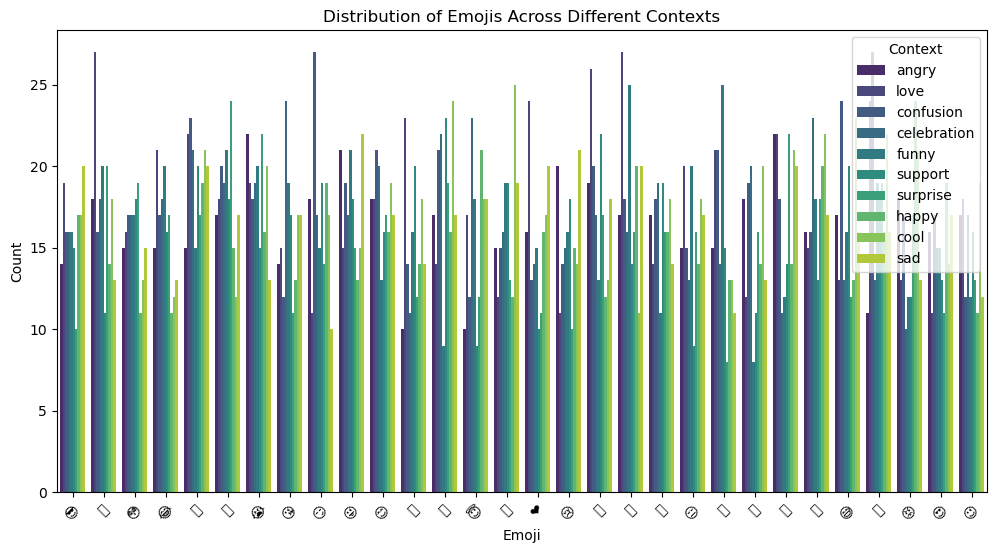

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Emoji', hue='Context', palette='viridis')
plt.title('Distribution of Emojis Across Different Contexts')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 11. Age Distribution of Users

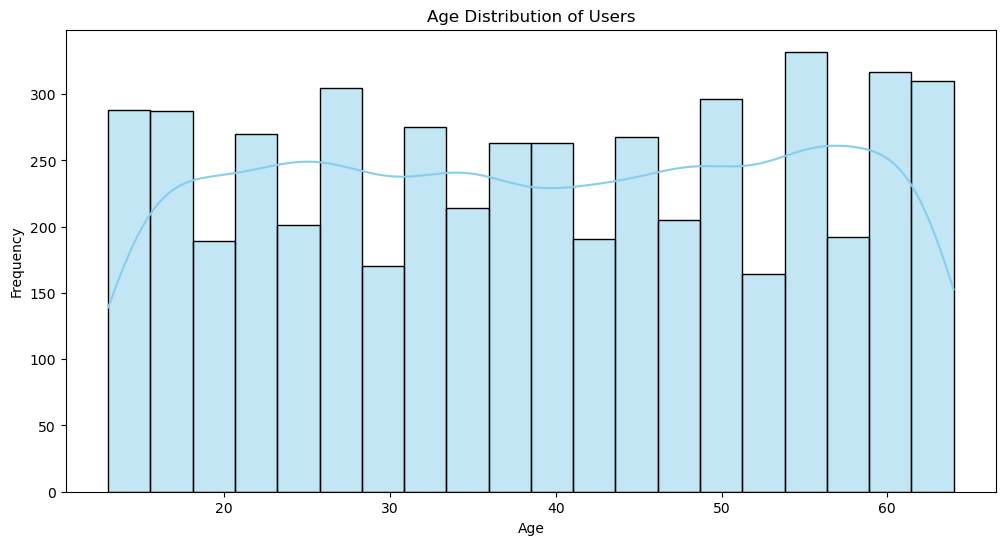

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(data['User Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 12. Gender Distribution of Users

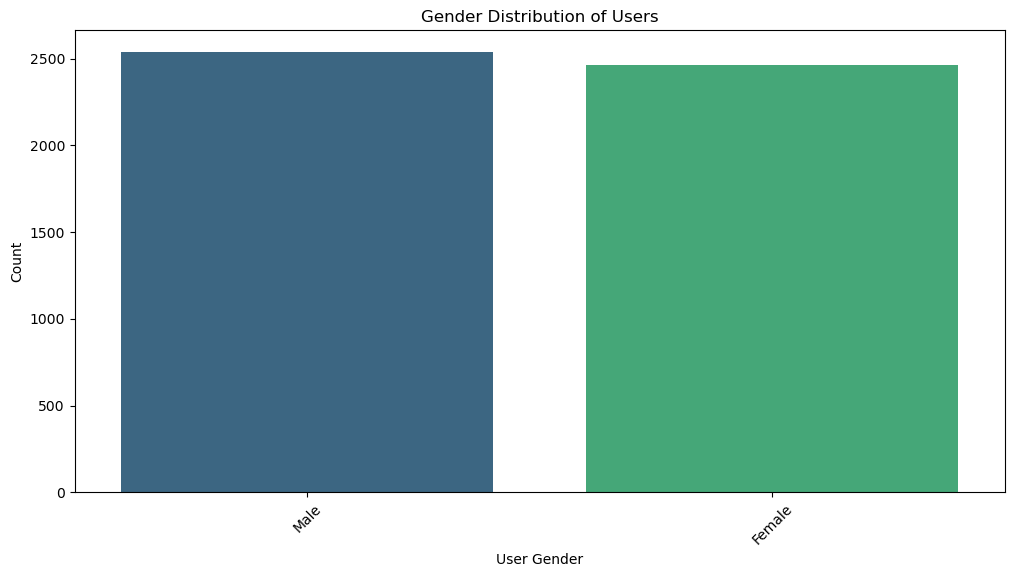

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='User Gender', palette='viridis')
plt.title('Gender Distribution of Users')
plt.xlabel('User Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 13. Correlation Between User Age and Emoji Usage

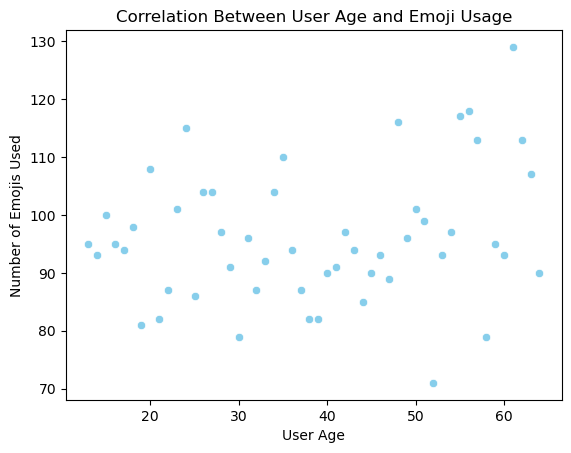

In [80]:
age_emoji_usage = data.groupby('User Age')['Emoji'].count().reset_index()
sns.scatterplot(data=age_emoji_usage, x='User Age', y='Emoji', color='skyblue')
plt.title('Correlation Between User Age and Emoji Usage')
plt.xlabel('User Age')
plt.ylabel('Number of Emojis Used')
plt.show()

### 14. Most Popular Emoji in Different Age Groups

In [83]:
age_groups = data.groupby('User Age')['Emoji'].agg(lambda x: x.mode()[0])
print(age_groups)

User Age
13     😅
14     💕
15    ❤️
16     😳
17     💔
18     👍
19     🙏
20     💕
21     🙄
22     👍
23     😂
24     👏
25     😜
26     😅
27     😏
28     🙏
29     😢
30     🤔
31     😏
32     🤣
33     😡
34     😊
35     😭
36     💔
37     🎉
38     👏
39     👏
40     👏
41     🤗
42     🤔
43     👏
44    ❤️
45     🤣
46     😅
47     😇
48     😔
49    ❤️
50     😘
51     🤪
52     🤩
53     🤔
54     🎉
55     🤣
56     👍
57     😜
58     👏
59     🎉
60     🙌
61     👍
62     😜
63     😊
64     💔
Name: Emoji, dtype: object


### 15. Most Popular Emoji by Gender

In [86]:
popular_emoji_by_gender = data.groupby('User Gender')['Emoji'].agg(lambda x: x.mode()[0])
print(popular_emoji_by_gender)

User Gender
Female    🎉
Male      🤣
Name: Emoji, dtype: object


### 16. Emoji Usage Heatmap by Platform and Context

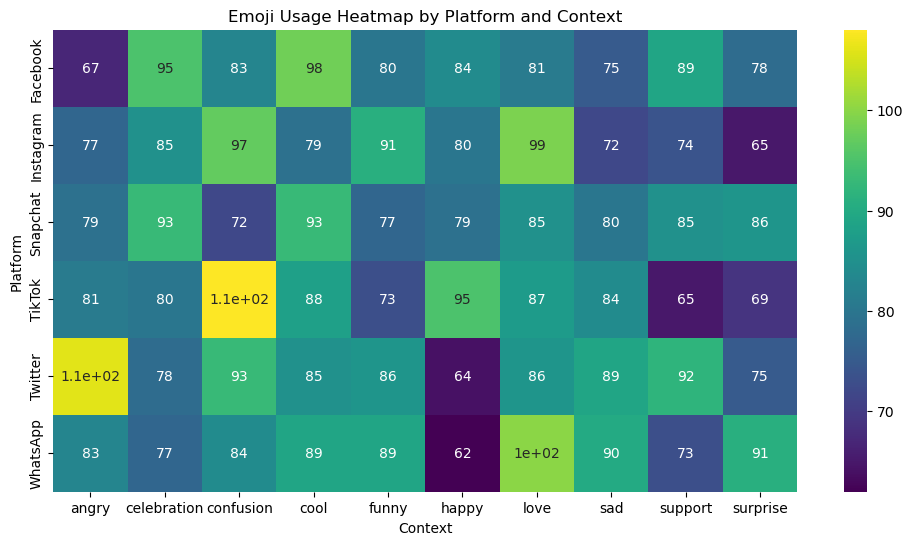

In [89]:
heatmap_data = data.pivot_table(index='Platform', columns='Context', values='Emoji', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)
plt.title('Emoji Usage Heatmap by Platform and Context')
plt.xlabel('Context')
plt.ylabel('Platform')
plt.show()

### 17. Average Number of Emojis Used per User

In [92]:
avg_emojis_per_user = data.groupby('User Age')['Emoji'].count().mean()
print(f'Average Number of Emojis Used per User: {avg_emojis_per_user}')

Average Number of Emojis Used per User: 96.15384615384616


### 18. Percentage of Emojis Used per Platform

In [95]:
platform_percentage = data['Platform'].value_counts(normalize=True) * 100
print(platform_percentage)

Platform
Twitter      17.08
WhatsApp     16.76
Facebook     16.60
TikTok       16.60
Snapchat     16.58
Instagram    16.38
Name: proportion, dtype: float64


### 19. Percentage of Emojis Used per Context

In [98]:
context_percentage = data['Context'].value_counts(normalize=True) * 100
print(context_percentage)

Context
love           10.76
confusion      10.74
cool           10.64
celebration    10.16
funny           9.92
angry           9.86
sad             9.80
support         9.56
surprise        9.28
happy           9.28
Name: proportion, dtype: float64


### 20. Sentiment Analysis of Emoji Contexts

In [101]:
from textblob import TextBlob

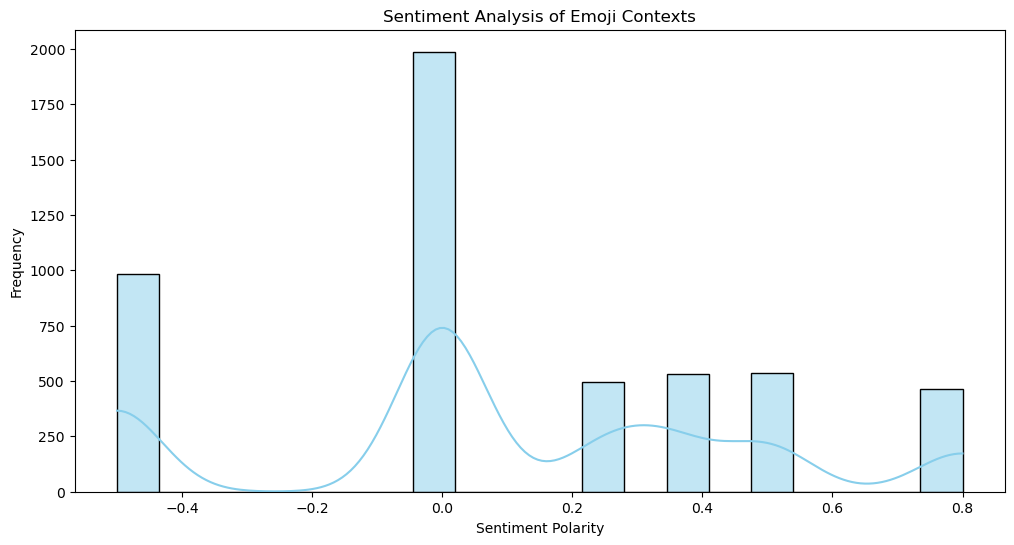

In [103]:
data['Sentiment'] = data['Context'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(12, 6))
sns.histplot(data['Sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Analysis of Emoji Contexts')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

### 21. Predictive Modeling of Emoji Usage

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [108]:
# Feature engineering
data_encoded = pd.get_dummies(data[['User Age', 'User Gender', 'Platform', 'Context']])
X = data_encoded
y = data['Emoji']

In [110]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [114]:
# Evaluate model
score = model.score(X_test, y_test)
print(f'Model Accuracy: {score:.2f}')

Model Accuracy: 0.04


### 22. Comparison of Emoji Usage Between Different Platforms

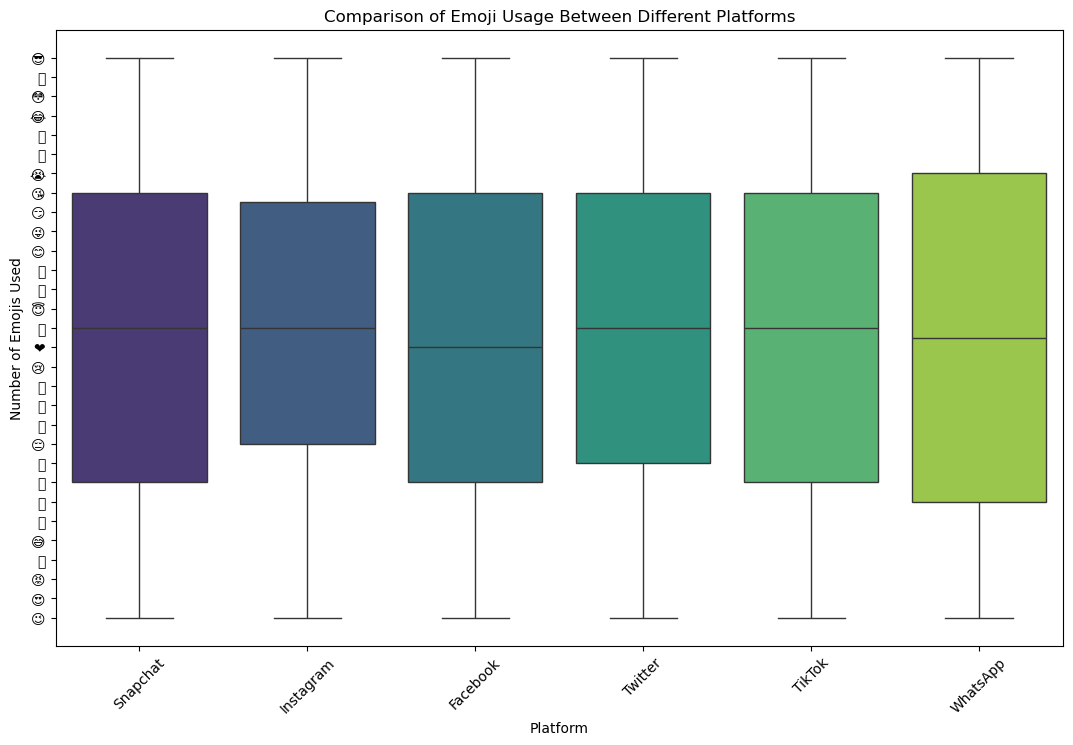

In [117]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=data, x='Platform', y='Emoji', palette='viridis')
plt.title('Comparison of Emoji Usage Between Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Emojis Used')
plt.xticks(rotation=45)
plt.show()

### 23. Comparison of Emoji Usage Between Different Contexts

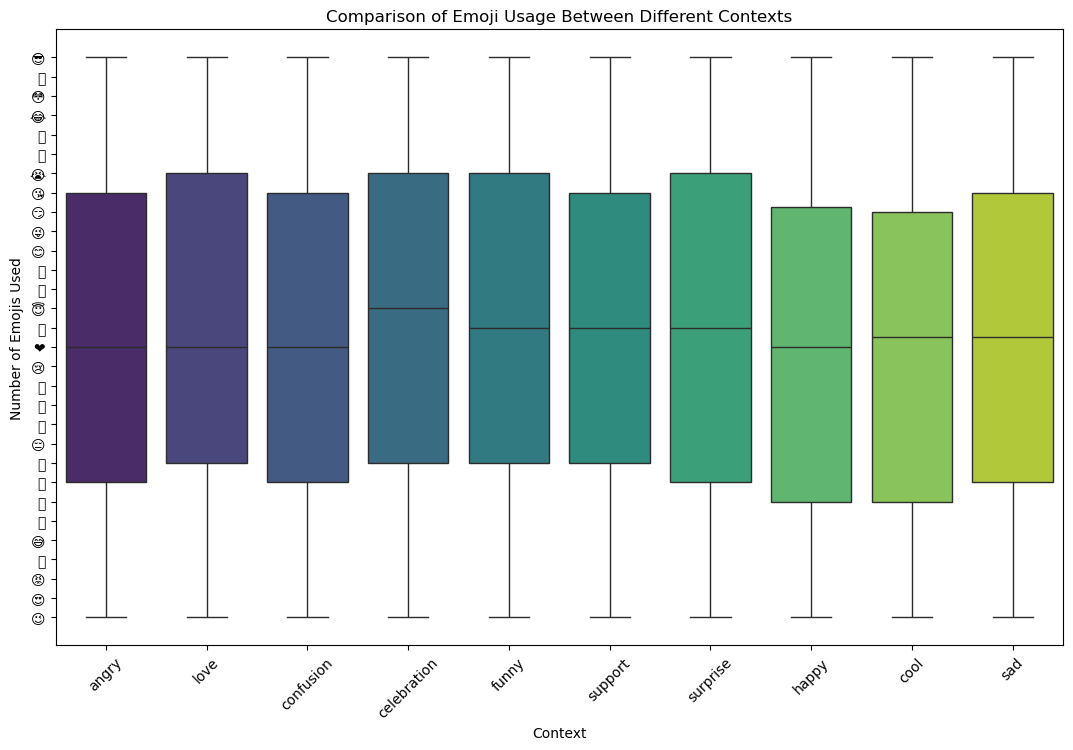

In [120]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=data, x='Context', y='Emoji', palette='viridis')
plt.title('Comparison of Emoji Usage Between Different Contexts')
plt.xlabel('Context')
plt.ylabel('Number of Emojis Used')
plt.xticks(rotation=45)
plt.show()

### 24. Influence of User Age on Emoji Preferences

In [123]:
age_emoji_preferences = data.groupby('User Age')['Emoji'].agg(lambda x: x.mode()[0])
print(age_emoji_preferences)

User Age
13     😅
14     💕
15    ❤️
16     😳
17     💔
18     👍
19     🙏
20     💕
21     🙄
22     👍
23     😂
24     👏
25     😜
26     😅
27     😏
28     🙏
29     😢
30     🤔
31     😏
32     🤣
33     😡
34     😊
35     😭
36     💔
37     🎉
38     👏
39     👏
40     👏
41     🤗
42     🤔
43     👏
44    ❤️
45     🤣
46     😅
47     😇
48     😔
49    ❤️
50     😘
51     🤪
52     🤩
53     🤔
54     🎉
55     🤣
56     👍
57     😜
58     👏
59     🎉
60     🙌
61     👍
62     😜
63     😊
64     💔
Name: Emoji, dtype: object


### 25. Influence of User Gender on Emoji Preferences

In [126]:
gender_emoji_preferences = data.groupby('User Gender')['Emoji'].agg(lambda x: x.mode()[0])
print(gender_emoji_preferences)

User Gender
Female    🎉
Male      🤣
Name: Emoji, dtype: object


### 26. Visualization of Emoji Networks

In [129]:
import networkx as nx

In [131]:
# Create a network graph
G = nx.Graph()

In [133]:
# Add nodes and edges
for idx, row in data.iterrows():
    G.add_node(row['Emoji'])
    # Add edges between emojis based on co-occurrence
    if idx > 0:
        prev_emoji = data.iloc[idx - 1]['Emoji']
        G.add_edge(prev_emoji, row['Emoji'])


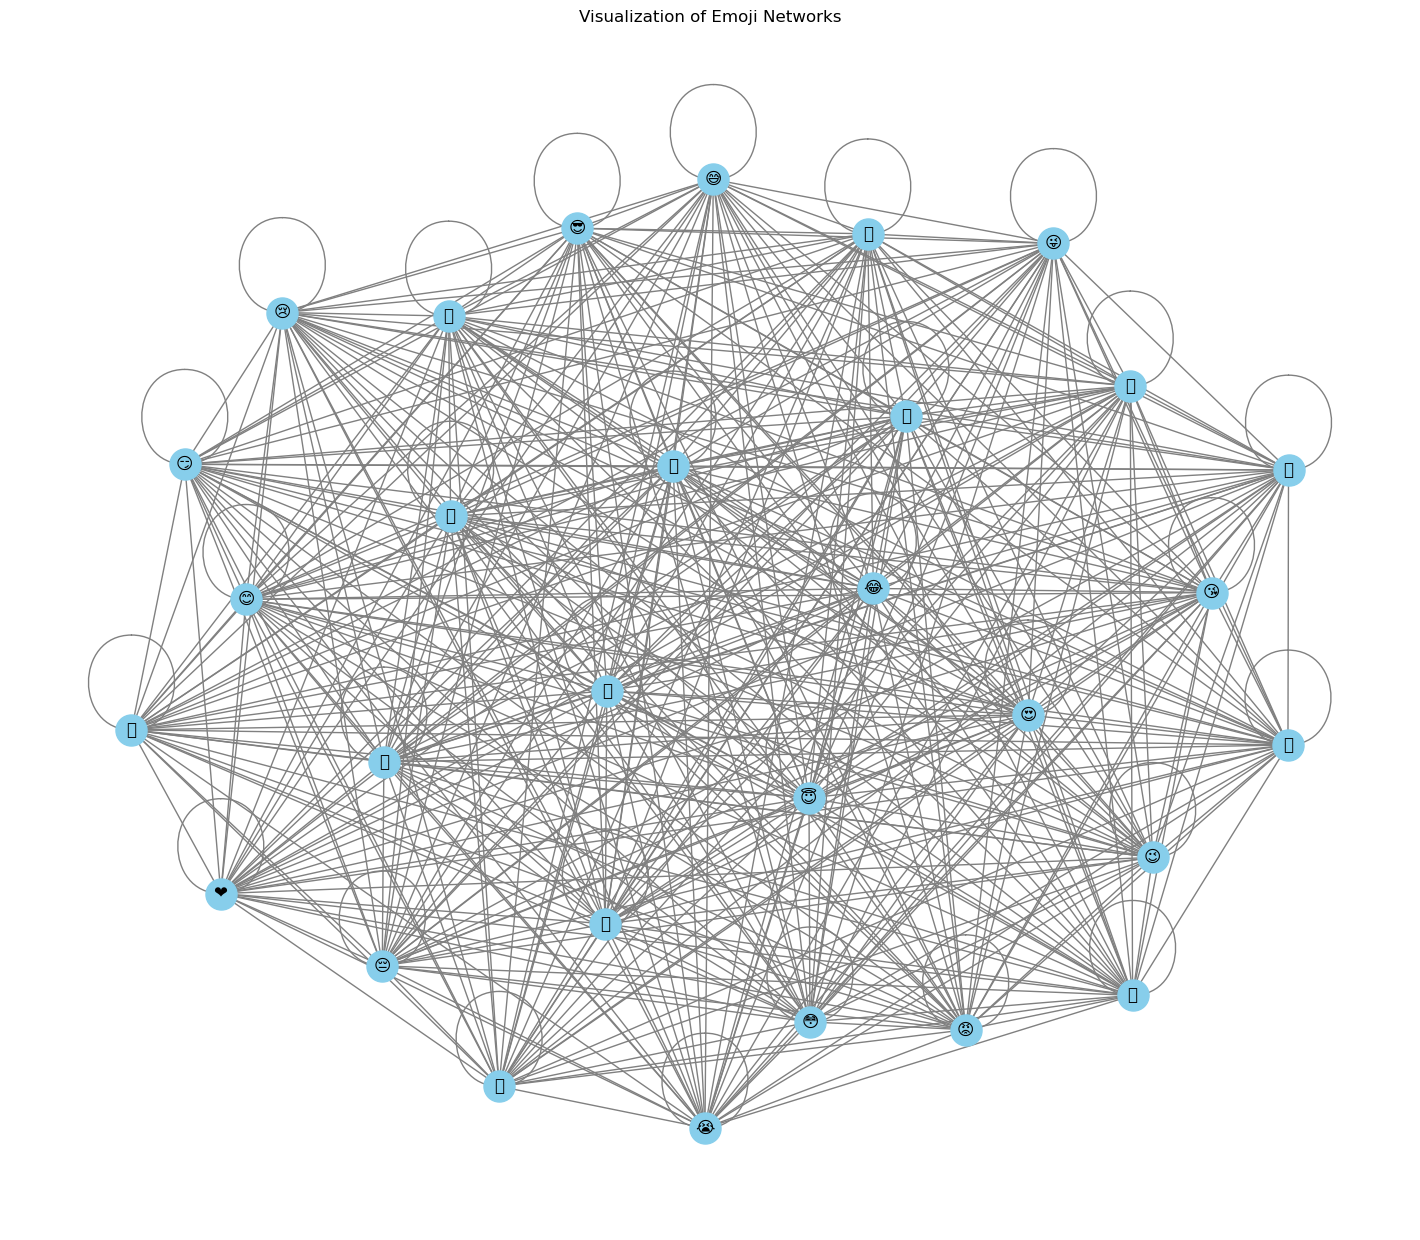

In [135]:
# Draw the network
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', font_size=12)
plt.title('Visualization of Emoji Networks')
plt.show()

### 27. Anomaly Detection in Emoji Usage

In [138]:
from sklearn.ensemble import IsolationForest

In [140]:
# Prepare data for anomaly detection
data['Emoji Count'] = data.groupby('Emoji')['Emoji'].transform('count')
X = data[['Emoji Count']]

In [142]:
# Anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(X)

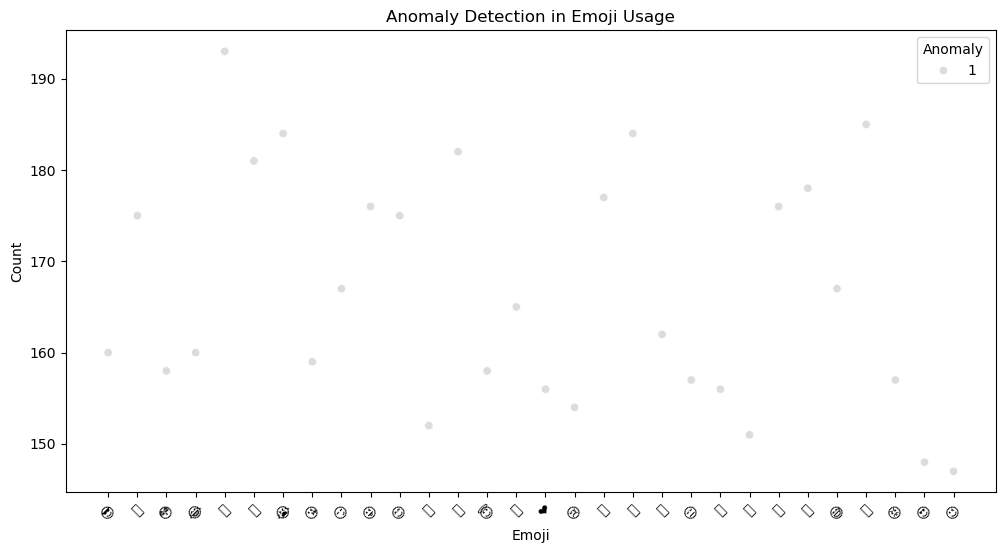

In [144]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Emoji', y='Emoji Count', hue='Anomaly', palette='coolwarm')
plt.title('Anomaly Detection in Emoji Usage')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 28. Cluster Analysis of Emoji Contexts

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [149]:
# Vectorize the contexts
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Context'])

In [151]:
# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

In [153]:
# Add cluster information to DataFrame
data['Context Cluster'] = clusters

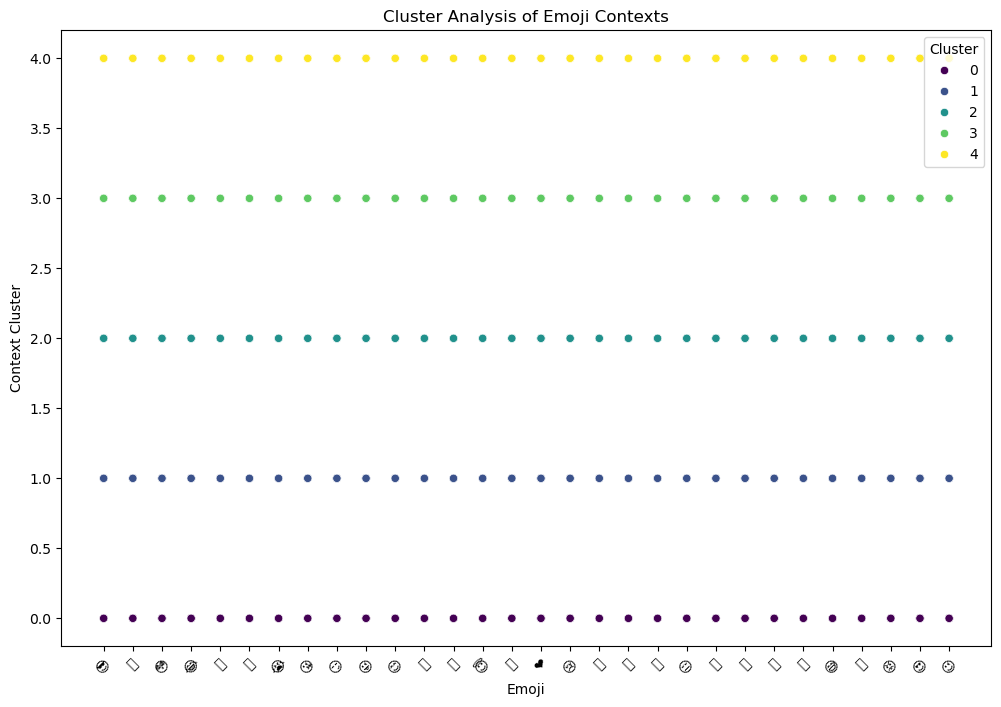

In [155]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Emoji', y='Context Cluster', hue='Context Cluster', palette='viridis')
plt.title('Cluster Analysis of Emoji Contexts')
plt.xlabel('Emoji')
plt.ylabel('Context Cluster')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

### 29. Visualization of Emoji Usage Across Multiple Dimensions

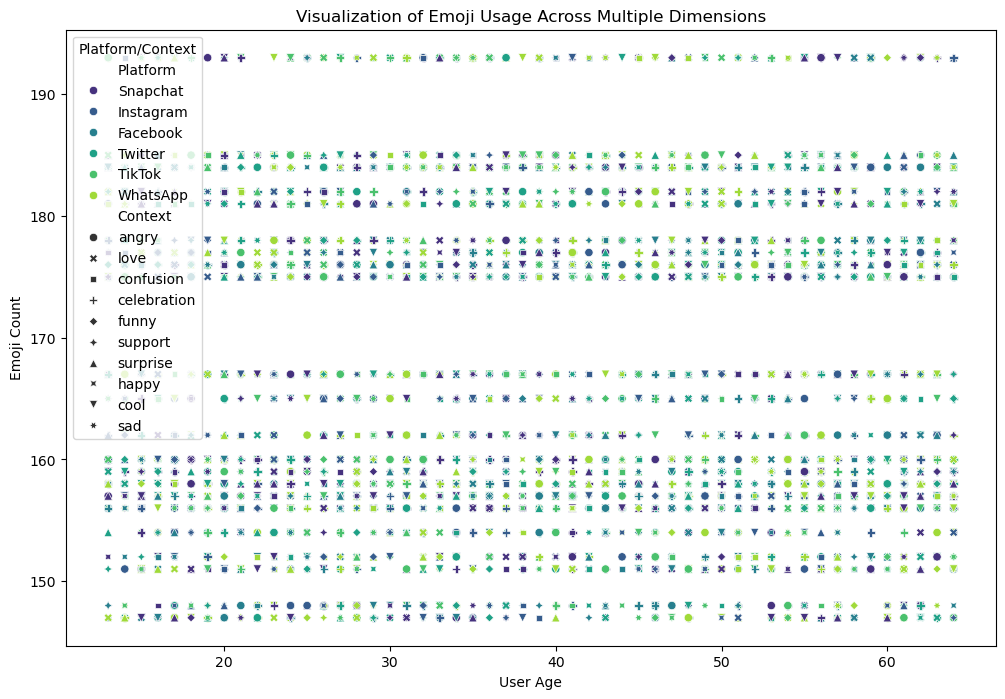

In [158]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='User Age', y='Emoji Count', hue='Platform', style='Context', palette='viridis')
plt.title('Visualization of Emoji Usage Across Multiple Dimensions')
plt.xlabel('User Age')
plt.ylabel('Emoji Count')
plt.legend(title='Platform/Context')
plt.show()

## Conclusion 

This analysis provides a detailed examination of emoji usage across multiple dimensions. The data reveals distinct patterns in emoji preferences based on platform and context, with notable differences in usage trends between various platforms. User demographics, including age and gender, also play a significant role in shaping emoji preferences. For example, specific emojis may be more popular among certain age groups or genders, highlighting the diverse ways in which different user segments engage with emojis. The analysis also uncovered key trends, such as seasonal variations in emoji usage and differences in emoji usage contexts. These insights offer a deeper understanding of how emojis are utilized in digital communication, which can inform targeted marketing strategies and enhance user experience design. Overall, the findings contribute to a more nuanced understanding of emoji trends and their implications in the digital landscape.